In [1]:
import numpy as np
import matplotlib.pyplot as plt

import glob

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#custom functions
from helpers import*
%matplotlib inline

In [2]:
forest_data_path = glob.glob("data/forest/*")
tallbuilding_data_path = glob.glob("data/tallbuilding/*")
highway_data_path = glob.glob("data/highway/*")

In [3]:
def modify_x(X, rowsize=36):
    temp_X = []
    for img_index in range(X.shape[0]//rowsize):
        temp_X.append((X[rowsize*img_index:rowsize*(img_index+1)]).sum(axis=0))
    return np.array(temp_X).reshape(-1,23)


In [4]:
cA = []
for item in forest_data_path:
    cA.append(np.loadtxt(item))

cB = []
for item in tallbuilding_data_path:
    cB.append(np.loadtxt(item))
    
cC = []
for item in highway_data_path:
    cC.append(np.loadtxt(item))
    
cA = modify_x(np.array(cA))
cB = modify_x(np.array(cB))
cC = modify_x(np.array(cC))

cA_train,cA_test = train_test_split(cA, test_size=0.3, random_state=42)
cB_train,cB_test = train_test_split(cB, test_size=0.3, random_state=42) 
cC_train,cC_test = train_test_split(cC, test_size=0.3, random_state=42) 

In [5]:
XA = cA_train.reshape(-1,23)
XB = cB_train.reshape(-1,23)
XC = cC_train.reshape(-1,23)

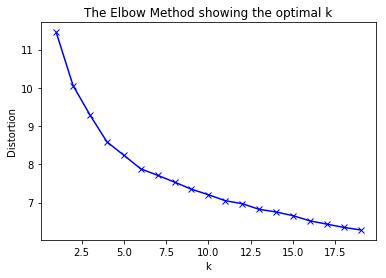

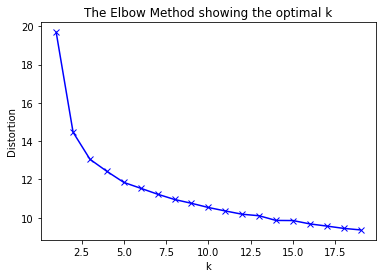

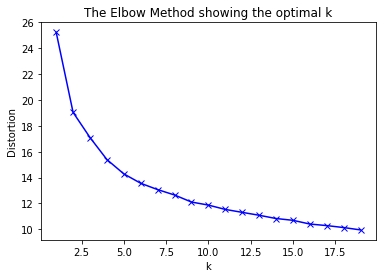

In [6]:
plot_elbow(XA, 20)
plot_elbow(XB, 20)
plot_elbow(XC, 20)

### Applying PCA to data

[ 51.6   61.21  69.16  74.84  78.69  81.95  84.92  87.72  90.13  92.24
  93.8   95.12  96.22  97.11  97.83  98.44  98.94  99.36  99.71  99.92
  99.97  99.97  99.97]


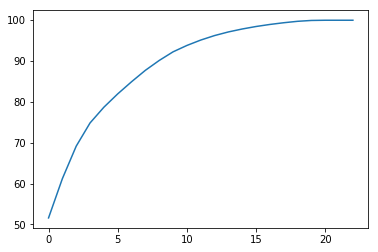

[  39.92   63.84   71.23   75.81   79.77   83.42   86.27   88.71   90.85
   92.82   94.46   95.75   96.91   97.82   98.48   98.96   99.36   99.6
   99.8    99.94  100.    100.    100.  ]


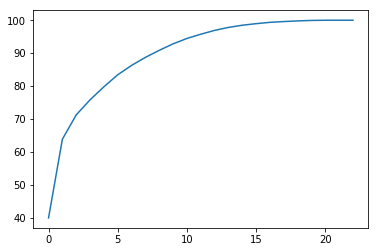

[ 45.09  67.9   74.66  79.56  83.54  86.85  89.8   92.17  93.77  95.36
  96.59  97.57  98.29  98.9   99.31  99.53  99.69  99.81  99.89  99.96
  99.98  99.99  99.99]


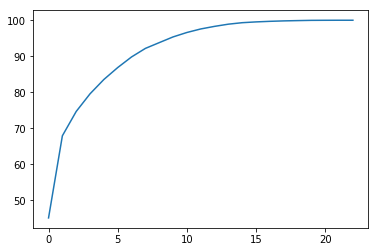

In [7]:
def pca_x(X):
    X = scale(X)
    pca = PCA(n_components=23)
    pca.fit(X)

    #The amount of variance that each PC explains
    var= pca.explained_variance_ratio_

    #Cumulative Variance explains
    var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

    print(var1)
    plt.plot(var1)
    plt.show()
    
pca_x(XA)
pca_x(XB)
pca_x(XC)

In [24]:
def transform_x(X,n=6):
    pca = PCA(n_components=n)
    pca.fit(X)
    return pca.fit_transform(X)

X1A = transform_x(XA)
X1B = transform_x(XB)
X1C = transform_x(XC)

In [25]:
# X1A = XA
# X1B = XB
# X1C = XC

In [26]:
#A 40, #B 40, #C 40
gA_new = pipeline(X1A, K=10, error=1)
gB_new = pipeline(X1B, K=10, error=1)
gC_new = pipeline(X1C, K=10, error=1)

[ 19.96220721]
[ 19.96220721]
[ 19.58172276]
[ 8.8295551]
[ 4.69434019]
[ 3.9729747]
[ 4.53518589]
[ 1.92436059]
[ 0.58262659]
[ 0.26764173]
[ 0.20905438]
[ 0.19898316]
[ 0.21617862]
[ 0.28269504]
[ 0.51040234]
[ 1.0445875]
[ 1.02278724]
[ 0.6338421]
[ 0.64401691]
[ 1.06319057]
[ 3.19734756]
[ 2.64263234]
[ 1.5298917]
[ 1.18927209]
[ 0.68606721]
[ 0.33477768]
[ 0.19965097]
[ 0.16525596]
[ 0.1679677]
[ 0.16100953]
[ 0.12775841]
[ 0.13202316]
[ 0.28253439]
[ 0.5455027]
[ 0.26280271]
Iterations : 35
[ 8.45631607]
[ 8.45631607]
[ 4.92048611]
[ 8.14696103]
[ 10.46335747]
[ 7.31118831]
[ 7.83769436]
[ 6.87334509]
[ 4.38284041]
[ 2.57505015]
[ 0.98020902]
[ 0.38036466]
[ 0.2704265]
[ 0.39143058]
[ 0.79127717]
[ 1.08307027]
[ 1.06995043]
[ 0.86020261]
[ 1.05417927]
[ 1.33215567]
[ 1.25324027]
[ 0.88281585]
[ 0.51002105]
[ 0.37546578]
[ 0.36294179]
[ 0.44372482]
[ 0.51397681]
[ 0.33905256]
[ 0.15977043]
[ 0.10555572]
Iterations : 30
[ 7.86246816]
[ 7.86246816]
[ 3.03464984]
[ 1.42914908]
[ 0.96

In [52]:
def class_scores(gmm, img_features):
    return gmm.predict_scores(img_features)

def classify(gA, gB, gC, img_feature):
    if class_scores(gA, img_feature) > max(class_scores(gB, img_feature), class_scores(gC, img_feature)):
        return 1
    elif class_scores(gB, img_feature) > max(class_scores(gA, img_feature), class_scores(gC, img_feature)):
        return 2
    else:
        return 3
    
def classify_scores(gA, gB, gC, img_feature):
    if class_scores(gA, img_feature) > max(class_scores(gB, img_feature), class_scores(gC, img_feature)):
        return 1
    elif class_scores(gB, img_feature) > max(class_scores(gA, img_feature), class_scores(gC, img_feature)):
        return 2
    else:
        return 3
    
def get_scores(gA, gB, gC, img_feature):
    return (class_scores(gA, img_feature), class_scores(gB, img_feature), class_scores(gC, img_feature))


In [58]:
#row_size :len of row size in entropy file
def count_classification(X, row_size=36):
    count_A = 0
    count_B = 0
    count_C = 0

    for i in range(X.shape[0]):
        if 1==classify(gA_new, gB_new, gC_new, X[i]):
            count_A+=1
        elif 2==classify(gA_new, gB_new, gC_new, X[i]):
            count_B+=1   
        else:
            count_C+=1

    print(count_A, count_B, count_C)
    return (count_A, count_B, count_C)

def build_scores(X, row_size=36):
    scores = np.empty((X.shape[0],3))
    for i in range(X.shape[0]):
        scores[i] = get_scores(gA_new, gB_new, gC_new, X[i])
    return scores



In [43]:
mem_train = []
mem_train.append(count_classification(X1A))
mem_train.append(count_classification(X1B))
mem_train.append(count_classification(X1C))
mem_train = np.array(mem_train)

X1A_test = transform_x(cA_test)
X1B_test = transform_x(cB_test)
X1C_test = transform_x(cC_test)

mem_test =[]
mem_test.append(count_classification(X1A_test))
mem_test.append(count_classification(X1B_test))
mem_test.append(count_classification(X1C_test))
mem_test = np.array(mem_test)

51 32 15
14 49 35
4 22 50


In [92]:
def acc(mem):
    return (mem[0][0]+mem[1][1]+mem[2][2])/sum(mem.sum(axis=1))

print("Train Accuracy : ",acc(mem_train))
print("Test Accuracy : ",acc(mem_test))

Train Accuracy :  0.850318471338
Test Accuracy :  0.551470588235


In [ ]:
K=10, n=4

187 25 14
47 152 27
21 21 134

K=10, n=6

208 15 3
24 183 19
8 25 143



In [88]:
# ROC Curve
def roc(no_of_classes, actualValues, score ):

    no_of_test_points = actualValues.shape[0]
    #no_of_classes = 3
    
    TPR = []
    FPR = []
    t = []

    for threshold in np.arange(0, 1, 0.0001):
        t.append(threshold)
        TP = 0
        FP = 0
        FN = 0
        TN = 0
        for i in range(0, no_of_test_points):
            for j in range(0, no_of_classes):
                if actualValues[i] == j+1:
                    if score[i][j] >= threshold:  
                        TP = TP+1
                    elif score[i][j] < threshold:
                        FN = FN+1
                else:
                    if score[i][j] >= threshold:
                        FP = FP+1
                    elif score[i][j] < threshold:
                        TN = TN+1
        tpr = TP / (TP + FN)  
        fpr = FP / (FP + TN)
        TPR.append(tpr)
        FPR.append(fpr)
        #roc_auc.append(auc(fpr, tpr))
    rocPlot(FPR, TPR)
    
def rocPlot(FPR, TPR):
    plt.hist(TPR,20, alpha=0.7, label='C', color='blue')
    plt.hist(FPR,20, alpha=0.7, label='C', color='red')
    plt.show()

    plt.figure()
    lw = 2
    plt.plot(FPR, TPR, color='darkorange', lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    

In [89]:
actualLabels = np.array([1]*X1A_test.shape[0]+[2]*X1B_test.shape[0]+[3]*X1C_test.shape[0]).reshape(-1,1)
predicted_scores = np.vstack((build_scores(X1A_test), build_scores(X1B_test), build_scores(X1C_test)))

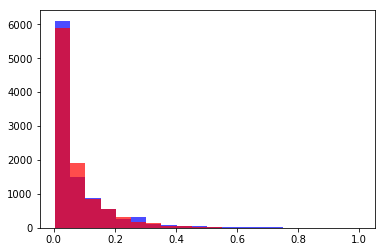

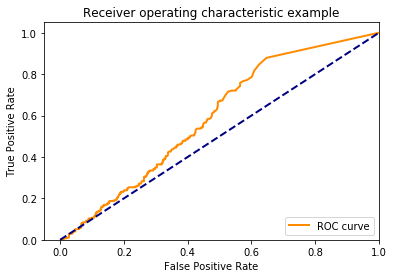

In [95]:
roc(3, actualLabels, temp_scores )

In [93]:
def normalize(X):
    return (X-min(X))/(max(X)-min(X))

temp_scores = predicted_scores
for i in range(3):
    temp_scores[:,i] = normalize(temp_scores[:,i])

In [ ]:


while not success:
    try next.plan

